<a href="https://colab.research.google.com/github/yashfx/Internship-Fx-data-labs/blob/Cats-v-dogs-classification/Cats_v_Dogs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [ ]:
# For linking the kaggle token with collab
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
# Download the data from the datset and and automatically comes into collab
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:48<00:00, 24.6MB/s]
100% 1.06G/1.06G [00:48<00:00, 23.7MB/s]


In [ ]:
# used to unzip the file
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# basic Installation of the required libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
# Generators is used to take a subset of data randomly from the dataset because we have lot of images in dataset
# for training data
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

# for testing data
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
# It is necessary because before this the images are stored in numpy array which range btw (0-255)
# So by using this we can convert then into (0-1)
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model
# Using kernel , stride , pooling , padding , flattening we are classifying
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
#Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
# model compilation and execution
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#Model running taking epoch 3 beacuse it takes lot of time For the problem make sure runtime will be set as GPU
history = model.fit(train_ds,epochs=3,validation_data=validation_ds)

Epoch 1/3
625/625 [==============================] - 78s 107ms/step - loss: 1.8425 - accuracy: 0.5742 - val_loss: 0.6615 - val_accuracy: 0.6134
Epoch 2/3
625/625 [==============================] - 67s 107ms/step - loss: 0.6228 - accuracy: 0.6645 - val_loss: 0.6264 - val_accuracy: 0.6486
Epoch 3/3
625/625 [==============================] - 67s 107ms/step - loss: 0.5343 - accuracy: 0.7309 - val_loss: 0.5368 - val_accuracy: 0.7194


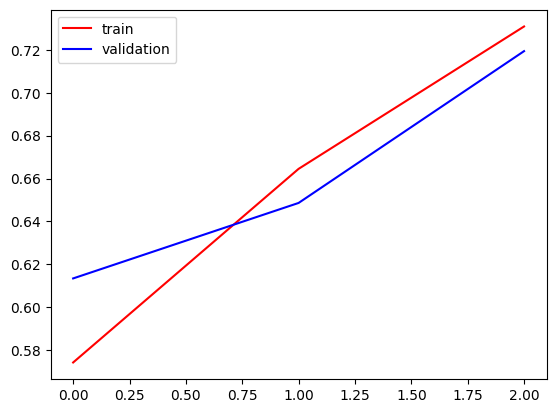

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

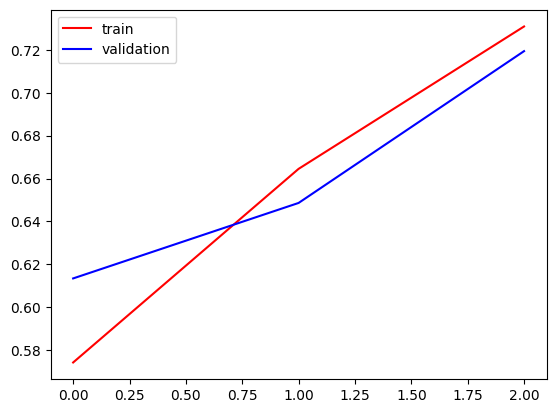

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

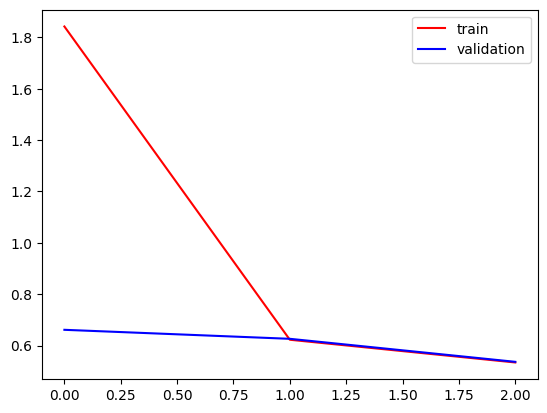

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

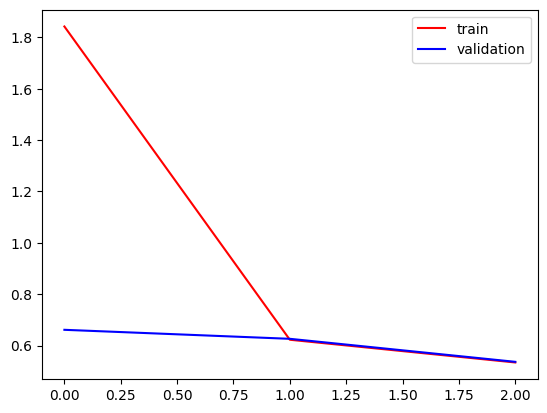

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [ ]:
# For testing purpose
import cv2

In [ ]:
test_img = cv2.imread('/content/test/cats/cat.10.jpg')

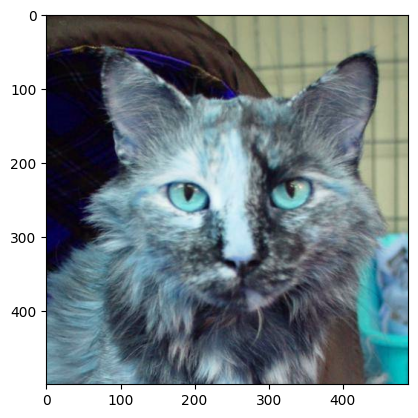

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(499, 489, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
# setting input such that contain 1 image having dimension 256,256,3
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 402ms/step


array([[0.]], dtype=float32)